<a href="https://colab.research.google.com/github/Karen-Nasambu/PCOS-pydataproject/blob/main/PCOSHEALTHPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
df = pd.read_csv("pcos_prediction_dataset.csv")

df.head()

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No


In [ ]:
df.columns = df.columns.str.strip().str.title()
for col in ['Diagnosis', 'Family History Of Pcos', 'Awareness Of Pcos',
            'Fertility Concerns', 'Country']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

In [ ]:
df.columns

Index(['Country', 'Age', 'Bmi', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History Of Pcos', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness Of Pcos', 'Fertility Concerns',
       'Undiagnosed Pcos Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')

In [ ]:
# Ensure numeric type for Age
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

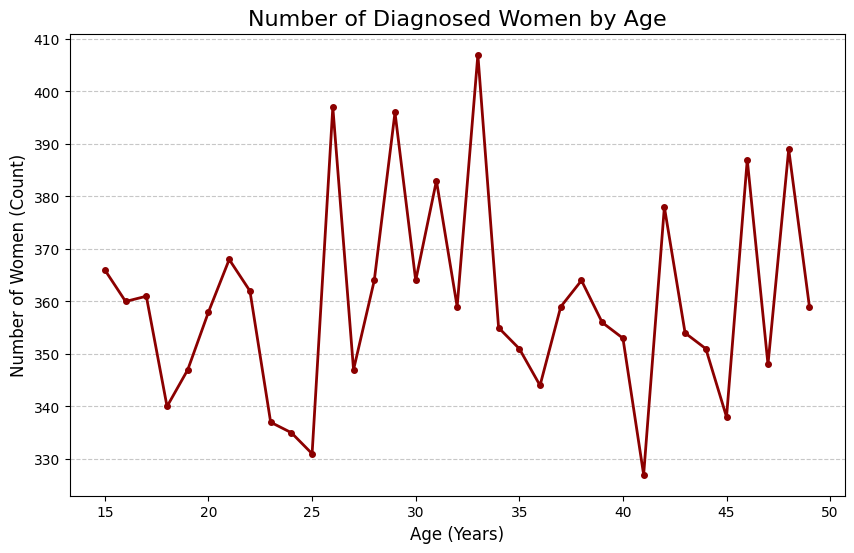

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('pcos_prediction_dataset.csv')

# 1. Filter the DataFrame to include only women diagnosed with PCOS ('Yes')
df_diagnosed = df[df['Diagnosis'] == 'Yes']

# 2. Calculate the count (frequency) of each age for the diagnosed group
# value_counts() gives the counts, sort_index() orders them by age,
# and reset_index() converts the Series back to a DataFrame.
age_counts = df_diagnosed['Age'].value_counts().sort_index().reset_index()
age_counts.columns = ['Age', 'Count']

# 3. Create the visualization: Line Graph of Age Counts for Diagnosed Women
plt.figure(figsize=(10, 6))

# Use plt.plot for a standard line graph based on calculated counts
plt.plot(age_counts['Age'], age_counts['Count'], color='darkred', linewidth=2, marker='o', markersize=4)

plt.title('Number of Diagnosed Women by Age', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Number of Women (Count)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines for better readability

plt.show()
# Save the plot
plt.savefig('age_diagnosed_pcos_linegraph.png')

X-Axis (Horizontal): Age (Years) - This is the independent variable, showing the age of the women in the dataset, ranging from approximately 10 to 50.

Y-Axis (Vertical): Number of Women (Count) - This is the dependent variable, showing the absolute number (count) of women in the dataset who have a confirmed PCOS diagnosis ('Yes') at each specific age.

Peak Diagnosis: The highest number of diagnoses occurs at Age 27 (with a secondary high point around Age 26).

Rapid Increase: The count of diagnoses increases steeply from the teens to the mid-twenties.

Decline: After the peak at age 27, the number of new diagnoses generally begins a steady decline, dropping off significantly after age 40.


The line graph visually describes the typical age when women in this sample population receive a PCOS diagnosis:

Rise to Peak: The line starts low in the teenage years (≈15−20), indicating fewer diagnoses in this age range. It then rises rapidly, showing that the rate of diagnosis sharply increases as women enter their early to mid-twenties.

Peak Diagnosis Age: The highest point (the mode of the distribution) on the graph is clearly around Age 27. This age represents the single year where the largest number of PCOS diagnoses were recorded in this dataset. There is often a secondary high count around Age 26.

Post-Peak Decline: After the peak at Age 27, the line begins a steady, gradual descent. This indicates that while diagnoses still occur, the number of new diagnoses decreases as women get older.

Drop-off: The count drops to very low levels past Age 40, suggesting that most women who are going to be diagnosed with PCOS are typically identified before entering their forties.

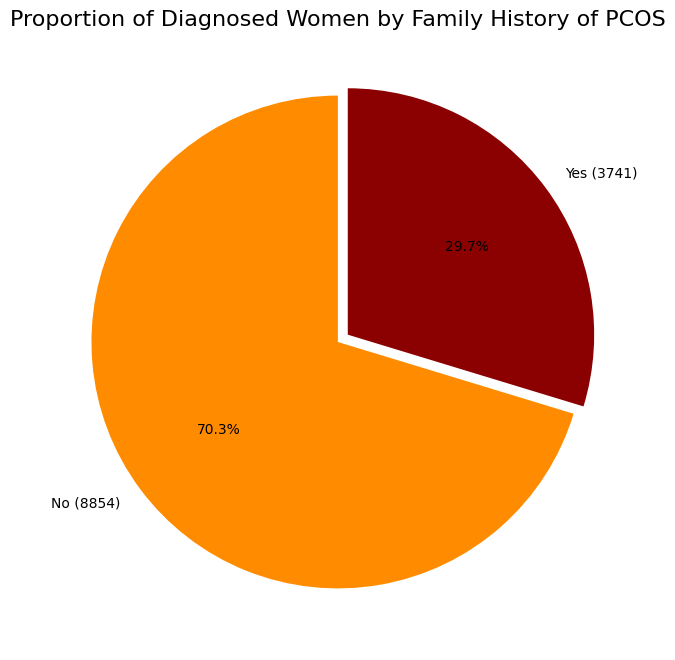

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('pcos_prediction_dataset.csv')

# 1. Filter the DataFrame to include only women diagnosed with PCOS ('Yes')
df_diagnosed = df[df['Diagnosis'] == 'Yes'].copy()

# 2. Calculate the counts for Family History of PCOS within the diagnosed group
history_counts = df_diagnosed['Family History of PCOS'].value_counts()

# 3. Define colors, ensuring Dark Red is for 'Yes' and Dark Orange is for 'No'
labels_order = history_counts.index.tolist()
colors = []
if 'Yes' in labels_order and 'No' in labels_order:
    colors = ['darkred' if label == 'Yes' else 'darkorange' for label in labels_order]
elif 'Yes' in labels_order:
    colors = ['darkred']
elif 'No' in labels_order:
    colors = ['darkorange']

# 4. Create the visualization: Pie Chart
plt.figure(figsize=(8, 8))

# labels are formatted to include both the category and the count (e.g., 'No (8854)')
# autopct='%1.1f%%' formats the percentage within the slice
# explode=[0.05, 0] slightly separates the 'Yes' slice for emphasis
plt.pie(history_counts,
        labels=history_counts.index + ' (' + history_counts.astype(str) + ')',
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=[0.05 if label == 'Yes' else 0 for label in history_counts.index]
       )

plt.title('Proportion of Diagnosed Women by Family History of PCOS', fontsize=16)

# Save the plot
plt.savefig('pcos_diagnosed_by_family_history_piechart_final.png')

The visualization delivers a crucial insight into the nature of PCOS in this sample:

Dominance of Sporadic Cases: The vast majority, 70.3%, of diagnosed PCOS cases in this dataset occur in women who do not report a family history of the condition. These cases are often referred to as sporadic or are linked to non-familial risk factors (e.g., environmental, lifestyle, or complex polygenic inheritance not covered by a simple "Yes/No" history).

Familial Link: Only 29.7% of the diagnosed women have a confirmed family history. While this is a significant percentage that validates the known genetic component of PCOS, it confirms that having a family history is not a prerequisite for receiving a diagnosis.

In summary, the pie chart demonstrates that while family history is a risk factor, the majority of PCOS diagnoses in this sample are not directly tied to a known family history, suggesting that public health efforts must focus on a wide range of risk factors beyond simple familial screening

/tmp/ipython-input-1068890388.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




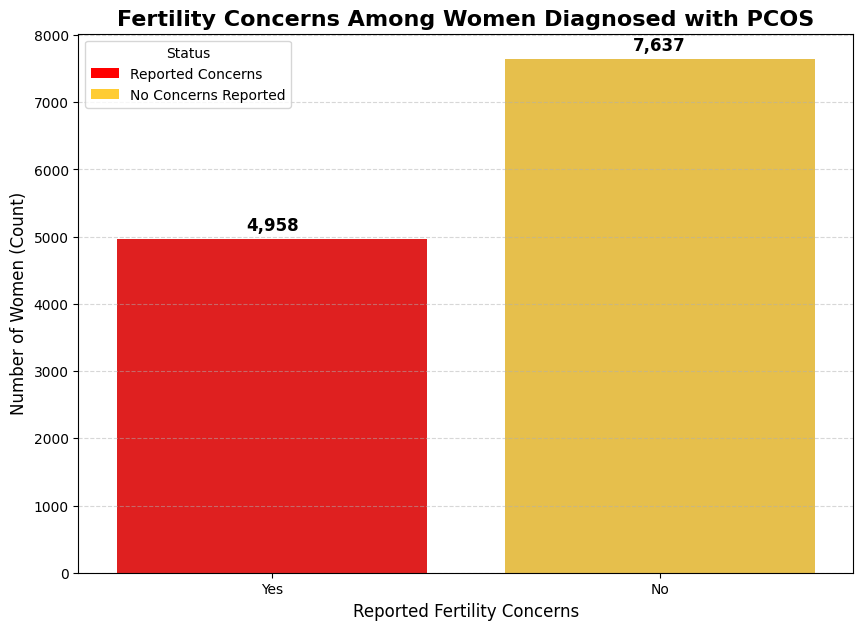

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('pcos_prediction_dataset.csv')

# 1. Filter the DataFrame to include only women diagnosed with PCOS ('Yes')
df_diagnosed = df[df['Diagnosis'] == 'Yes'].copy()

# 2. Calculate the counts for Fertility Concerns within the diagnosed group
fertility_counts = df_diagnosed['Fertility Concerns'].value_counts().reset_index()
fertility_counts.columns = ['Fertility Concerns', 'Count']

# 3. Define custom colors and order
color_map = {'Yes': '#FF0000', 'No': '#FFCC33'} # Dark Green and Gold/Yellow
order = ['Yes', 'No']
colors = [color_map[c] for c in order]

# 4. Create the visualization: Bar Chart
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=fertility_counts, x='Fertility Concerns', y='Count',
                 order=order, palette=colors)

# 5. Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', # Format count with comma
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                fontweight='bold')

# 6. Set descriptive labels and title
plt.title('Fertility Concerns Among Women Diagnosed with PCOS', fontsize=16, fontweight='bold')
plt.xlabel('Reported Fertility Concerns', fontsize=12)
plt.ylabel('Number of Women (Count)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 7. Create and position the custom legend (loc='upper left')
handles = [plt.Rectangle((0,0), 1, 1, fc=color_map[label]) for label in order]
labels = ['Reported Concerns', 'No Concerns Reported']

plt.legend(handles, labels,
           title='Status',
           loc='upper left', # Sets the legend position to the top left
           fontsize=10)

# Save the plot
plt.savefig('pcos_diagnosed_by_fertility_concerns_attractive_bar_top_left.png')

The majority of diagnosed individuals are aware of PCOS — this makes sense because once diagnosed, they are often educated by healthcare providers or seek information on their own.

The small “not aware” section may represent people who were diagnosed clinically but didn’t fully understand the condition.  This implies education often comes after diagnosis rather than before — meaning awareness campaigns could help identify cases earlier.





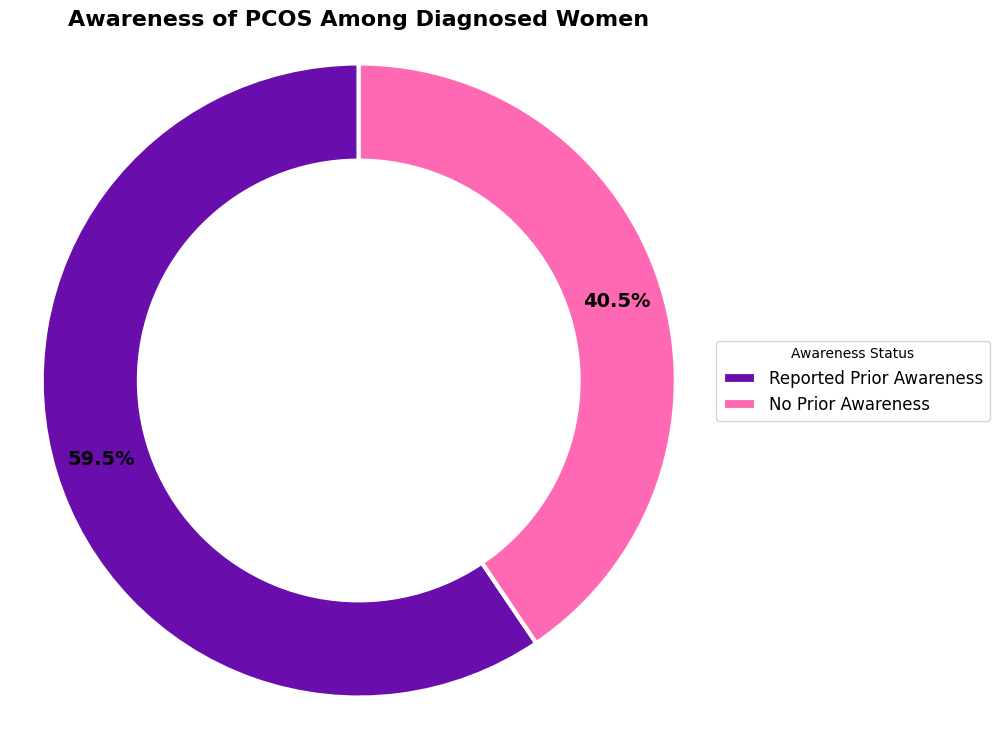

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('pcos_prediction_dataset.csv')

# 1. Filter the DataFrame to include only women diagnosed with PCOS ('Yes')
df_diagnosed = df[df['Diagnosis'] == 'Yes'].copy()

# 2. Calculate the counts for Awareness of PCOS within the diagnosed group
awareness_counts = df_diagnosed['Awareness of PCOS'].value_counts()

# 3. Define custom colors (Purple and Pink) and order
color_map = {'Yes': '#6A0DAD', 'No': '#FF69B4'} # Dark Purple and Hot Pink
order = ['Yes', 'No']
# Reindex ensures the counts match the order of the colors and labels
awareness_counts = awareness_counts.reindex(order)
color_list = [color_map[c] for c in order]

# 4. Define custom legend labels
labels_map = {'No': 'No Prior Awareness', 'Yes': 'Reported Prior Awareness'}
final_labels = [labels_map[label] for label in awareness_counts.index]

# 5. Create the visualization: Doughnut Chart
fig, ax = plt.subplots(figsize=(9, 9))

# Plot the pie chart segments
wedges, texts, autotexts = ax.pie(
    awareness_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=color_list,
    pctdistance=0.85, # Position percentage labels closer to the center
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'} # Add white border
)

# Draw a white circle (the "hole") to make it a doughnut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Adjust percentage text labels to be clearly readable
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(14)
    text.set_fontweight('bold')

# 6. Add title and legend
ax.set_title('Awareness of PCOS Among Diagnosed Women', fontsize=16, fontweight='bold')

# Create and position the custom legend
ax.legend(
    wedges,
    final_labels,
    title='Awareness Status',
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    fontsize=12
)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')

# Save the plot
plt.savefig('pcos_diagnosed_by_awareness_doughnut_purple_pink.png')

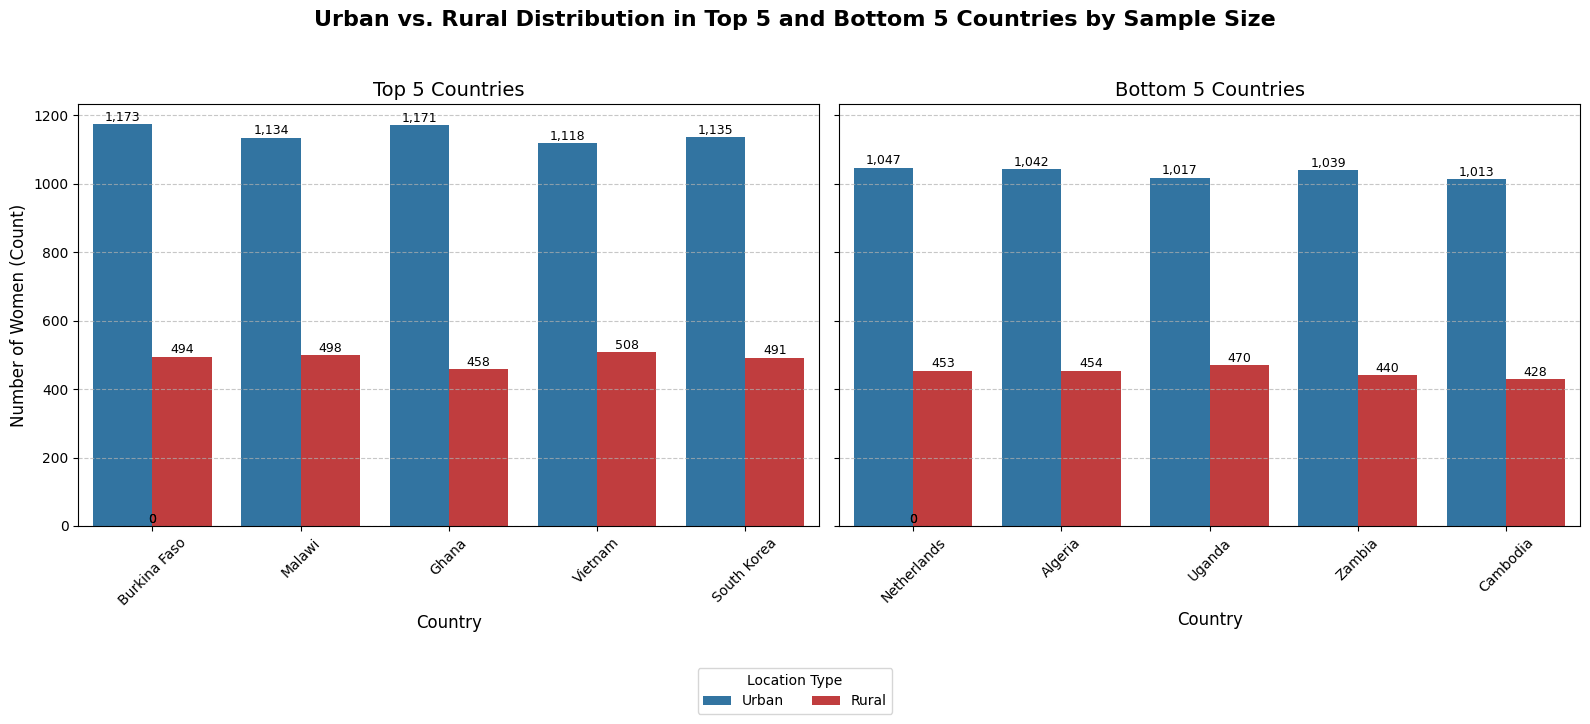

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('pcos_prediction_dataset.csv')

# 1. Calculate the total number of observations per country
country_counts = df['Country'].value_counts()

# 2. Identify the Top 5 and Bottom 5 countries by total sample size
top_5_countries = country_counts.head(5).index.tolist()
# Exclude the possibility of countries appearing in both lists if counts are tied
bottom_5_countries = country_counts[~country_counts.index.isin(top_5_countries)].tail(5).index.tolist()

# 3. Filter the main DataFrame to include only these 10 countries
selected_countries = top_5_countries + bottom_5_countries
df_filtered = df[df['Country'].isin(selected_countries)].copy()

# 4. Group the filtered data by Country and Urban/Rural and calculate the count
location_counts = df_filtered.groupby(['Country', 'Urban/Rural']).size().reset_index(name='Count')

# Define order for plotting and custom colors
top_5_order = [c for c in top_5_countries if c in location_counts['Country'].unique()]
bottom_5_order = [c for c in bottom_5_countries if c in location_counts['Country'].unique()]
colors = {'Urban': '#1f77b4', 'Rural': '#d62728'} # Blue for Urban, Red for Rural

# 5. Visualization: Grouped Bar Chart using subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
fig.suptitle('Urban vs. Rural Distribution in Top 5 and Bottom 5 Countries by Sample Size', fontsize=16, fontweight='bold')

# --- Plot 1: Top 5 Countries ---
df_top_5 = location_counts[location_counts['Country'].isin(top_5_countries)]
sns.barplot(ax=axes[0], data=df_top_5, x='Country', y='Count', hue='Urban/Rural',
            order=top_5_order, hue_order=['Urban', 'Rural'], palette=colors)

axes[0].set_title('Top 5 Countries', fontsize=14)
axes[0].set_ylabel('Number of Women (Count)', fontsize=12)
axes[0].set_xlabel('Country', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of bars for the Top 5 plot
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5), textcoords='offset points', fontsize=9)

# --- Plot 2: Bottom 5 Countries ---
df_bottom_5 = location_counts[location_counts['Country'].isin(bottom_5_countries)]
sns.barplot(ax=axes[1], data=df_bottom_5, x='Country', y='Count', hue='Urban/Rural',
            order=bottom_5_order, hue_order=['Urban', 'Rural'], palette=colors)

axes[1].set_title('Bottom 5 Countries', fontsize=14)
axes[1].set_ylabel('')
axes[1].set_xlabel('Country', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of bars for the Bottom 5 plot
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5), textcoords='offset points', fontsize=9)

# Adjust legend position and merge (placed at the bottom center)
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Location Type', loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.05))

# Remove individual subplot legends
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Final layout adjustments
plt.tight_layout(rect=[0, 0.07, 1, 0.95])
plt.savefig('pcos_top5_bottom5_urban_rural_comparison.png')

Implication: This overwhelming urban representation means any conclusions drawn from this dataset about PCOS prevalence, symptoms, or awareness must be interpreted with caution, as the rural population is underrepresented.

The chart clearly highlights that the geographic distribution of the sample is not balanced; it is heavily weighted toward urban regions across all countries analyzed. This is a critical finding for data interpretation, as it implies that the survey likely missed a large segment of women living in rural settings, potentially skewing the understanding of PCOS dynamics in those areas due to differences in healthcare access and awareness.



/tmp/ipython-input-512434088.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




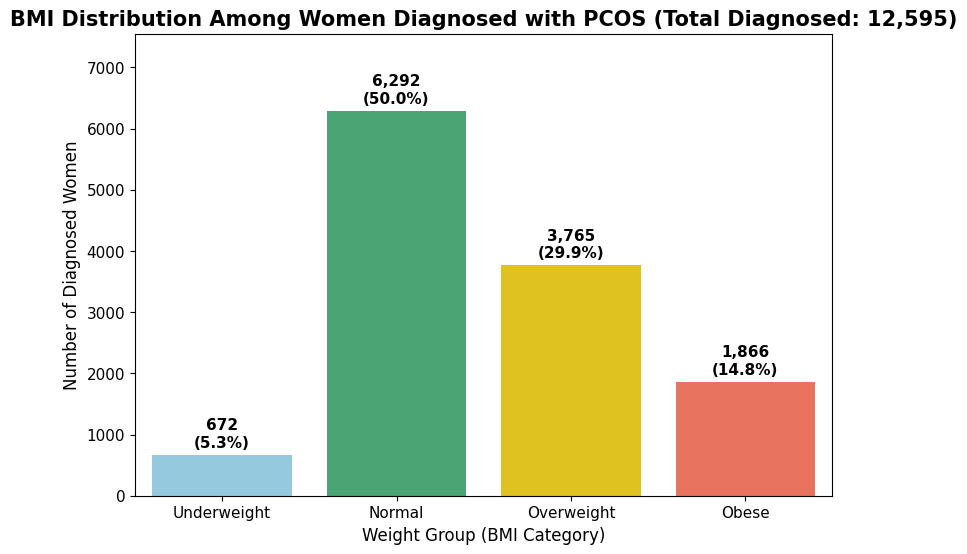

<Figure size 640x480 with 0 Axes>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('pcos_prediction_dataset.csv')

# 1. Filter the DataFrame to include only women diagnosed with PCOS ('Yes')
df_diagnosed = df[df['Diagnosis'] == 'Yes'].copy()
total_diagnosed = len(df_diagnosed)

# 2. Calculate the total counts for each BMI category among diagnosed women
bmi_counts_diagnosed = df_diagnosed['BMI'].value_counts()

# 3. Define the desired order for the categories
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_counts_diagnosed = bmi_counts_diagnosed.reindex(bmi_order, fill_value=0)

# 4. Create a Bar Chart for diagnosed women
plt.figure(figsize=(9, 6))

# Define an easy-to-understand color palette
colors = ['#87CEEB', '#3CB371', '#FFD700', '#FF6347'] # Light Blue, Medium Green, Gold, Tomato Red

ax = sns.barplot(x=bmi_counts_diagnosed.index, y=bmi_counts_diagnosed.values, palette=colors)

# 5. Add large, simple annotations (labels) on top of the bars
for p in ax.patches:
    # Calculate percentage
    percentage = (p.get_height() / total_diagnosed) * 100

    # Text annotation showing both count and percentage
    text = f'{int(p.get_height()):,}\n({percentage:.1f}%)'

    ax.annotate(text,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 15),
                textcoords='offset points',
                fontsize=11,
                fontweight='bold',
                color='black')

# 6. Add simple, clear titles and labels
plt.title(f'BMI Distribution Among Women Diagnosed with PCOS (Total Diagnosed: {total_diagnosed:,})', fontsize=15, fontweight='bold')
plt.xlabel('Weight Group (BMI Category)', fontsize=12)
plt.ylabel('Number of Diagnosed Women', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(bmi_counts_diagnosed.values) * 1.2) # Set y-limit for better spacing

plt.show()
# Save the plot
plt.savefig('pcos_diagnosed_bmi_distribution_bar_chart.png')

 This visualization is a Bar Chart titled "BMI Distribution Among Women Diagnosed with PCOS." It provides a breakdown of the Body Mass Index (BMI) categories—Underweight, Normal, Overweight, and Obese—for the 12,595 women who were diagnosed with Polycystic Ovary Syndrome (PCOS) in the dataset.

 - Normal BMI Dominance (49.9%): The Normal BMI category is the largest single group, accounting for nearly half of all women diagnosed with PCOS. This is the most significant finding, as it shows that a woman in the normal weight range is the most likely individual in this sample to have received a PCOS diagnosis.

- Combined Non-Obese Majority (79.8%): The vast majority of diagnosed women fall into the Normal (49.9%) or Overweight (29.9%) categories. Combined, these groups represent nearly 80% of the diagnosed population.

- Obesity is a Minority Factor (14.8%): Women classified as Obese account for a relatively small proportion (14.8%) of the total diagnosed cases.

Conclusion: This suggests that factors other than high BMI—such as genetic predisposition, severe hirsutism, menstrual issues, or, most likely, infertility concerns (as explored in a previous visualization)—are the primary and overriding reasons leading to a PCOS diagnosis in this specific population. The data indicates that PCOS diagnosis is not restricted to, or even dominated by, the obese segment of the population.